<a href="https://colab.research.google.com/github/areumham/tiny_python_projects/blob/master/model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# 구글 드라이브에서 가져올 폴더의 경로 설정
folder_path = '/content/drive/MyDrive/Colab Notebooks/Celebrity_Faces_Dataset'

# 폴더 내의 파일 목록 가져오기
file_list = os.listdir('/content/drive/MyDrive/Colab Notebooks/Celebrity_Faces_Dataset')

# 파일 목록 출력
print("Files in the folder:")
for file_name in file_list:
    print(file_name)

Files in the folder:
000140.jpg
000006.jpg
000095.jpg
000039.jpg
000162.jpg
000034.jpg
000086.jpg
000007.jpg
000028.jpg
000070.jpg
000083.jpg
000072.jpg
000129.jpg
000068.jpg
000152.jpg
000014.jpg
000035.jpg
000048.jpg
000122.jpg
000075.jpg
000114.jpg
000062.jpg
000066.jpg
000090.jpg
000103.jpg
000115.jpg
000156.jpg
000023.jpg
000020.jpg
000104.jpg
000126.jpg
000125.jpg
000004.jpg
000016.jpg
000142.jpg
000056.jpg
000112.jpg
000002.jpg
000087.jpg
000123.jpg
000040.jpg
000096.jpg
000118.jpg
000017.jpg
000105.jpg
000057.jpg
000013.jpg
000069.jpg
000160.jpg
000005.jpg
000131.jpg
000135.jpg
000145.jpg
000143.jpg
000019.jpg
000045.jpg
000077.jpg
000059.jpg
000151.jpg
000024.jpg
000137.jpg
000064.jpg
000144.jpg
000054.jpg
000074.jpg
000098.jpg
000134.jpg
000108.jpg
000037.jpg
000030.jpg
000018.jpg
000111.jpg
000130.jpg
000029.jpg
000042.jpg
000009.jpg
000067.jpg
000124.jpg
000094.jpg
000063.jpg
000159.jpg
000033.jpg
000101.jpg
000092.jpg
000073.jpg
000153.jpg
000008.jpg
000157.jpg
000163.jpg


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros, ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv2DTranspose, LeakyReLU
from keras.layers import BatchNormalization, Dropout, Reshape, Flatten

In [ ]:
# 디렉토리 경로 지정
dataset_dir = "/content/drive/MyDrive/Colab Notebooks/Celebrity_Faces_Dataset"

# glob.glob() 함수를 사용하여 데이서텟 디렉토리 안에 있는 .jpg 확장자 파일 경로
#image_paths 리스트에 저장
image_paths = glob.glob(os.path.join(dataset_dir, '*.jpg'))

# 필요한 만큼의 이미지만 선택(250장)
image_paths = image_paths[:250]

#이미지 파일의 경로를 받아 해당이미지를 불러와 전처리(load_and_preprocess_real_images 함수)
def load_and_preprocess_real_images(image_path, target_size=(64, 64)):
    #이미지 열기
    img = Image.open(image_path)
    #이미지 자르기
    img = img.crop((0, 20, 178, 198))
    #이미지 크기 조정
    img = img.resize(target_size)
    # #배열로 변환하여 정규
    img = np.array(img)/127.5 - 1
    return img

#모든 이미지를 불러와서 전처리하여 데이터셋을 생성(리스트 컴프리헨션)=> 그리고 배열로 변환
dataset = np.array([load_and_preprocess_real_images(img_path) for img_path in image_paths])

# 데이터셋의 형태를 출
print(dataset.shape)

(250, 64, 64, 3)


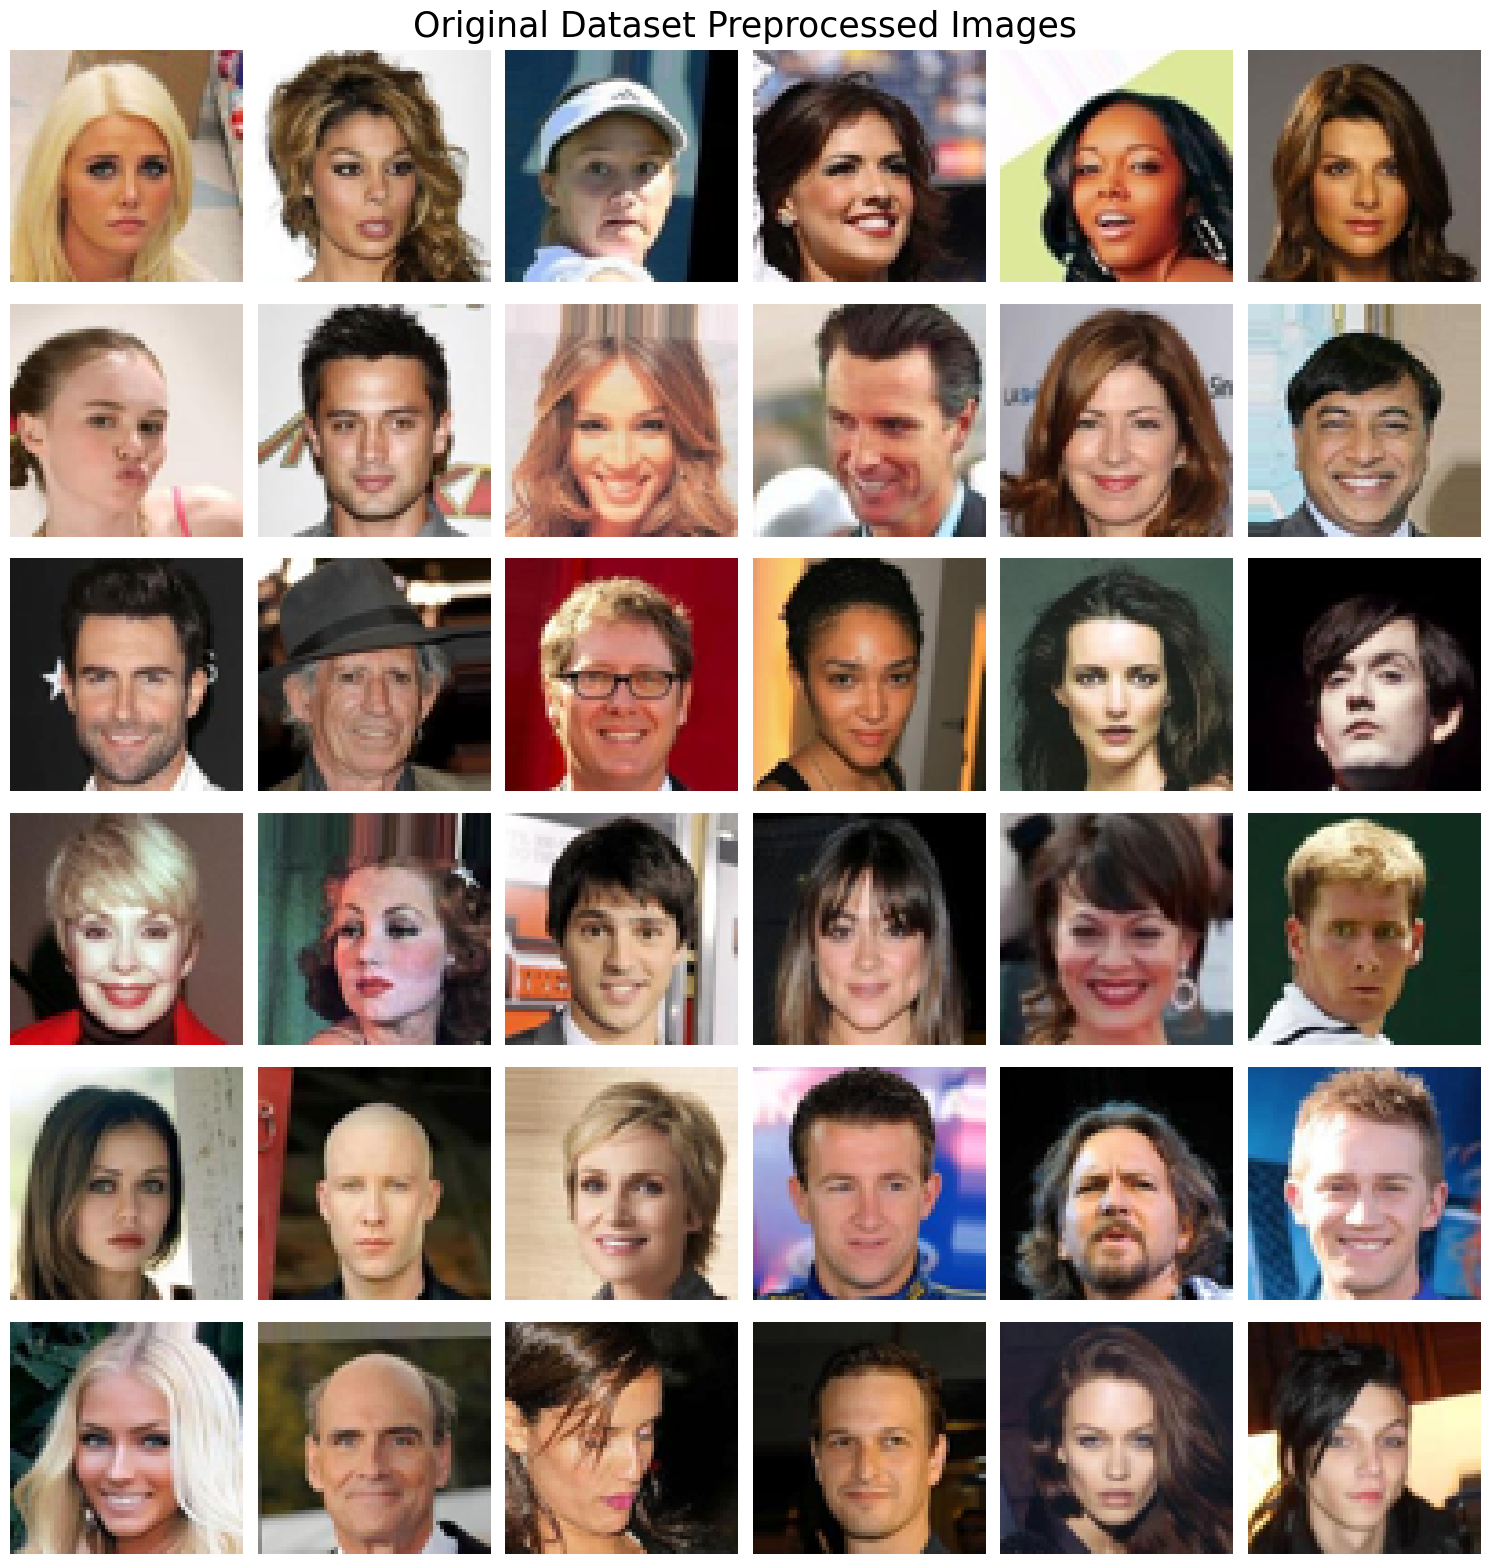

In [ ]:
# Create a subplot for the first 25 images
fig, axes = plt.subplots(6, 6, figsize=(15, 16))

for i, ax in enumerate(axes.flat):
    # Get the i-th image
    img = dataset[i]
    # Rescale the image to [0, 1] for plotting
    img_rescaled = (img + 1) / 2
    # Plot the image on the i-th subplot
    ax.imshow(img_rescaled)
    ax.axis('off')

# Add a super title
fig.suptitle('Original Dataset Preprocessed Images', fontsize=25)

plt.tight_layout()
plt.show()

In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()

    # Initial convolutional layer
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding='same', input_shape=image_shape))
    model.add(LeakyReLU(0.2))

    # Second convolutional layer
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Third convolutional layer
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Fourth convolutional layer
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Fifth convolutional layer
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Flatten and dense layer for classification
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    # Define optimizer and compile model
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

# Build and display discriminator summary
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         5

In [ ]:
def build_generator(latent_dim, channels=3):
    model = Sequential()

    # Initial dense layer
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))

    # Reshape to (16, 16, 128) tensor for convolutional layers
    model.add(Reshape((16, 16, 128)))

    # First deconvolutional layer
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Second deconvolutional layer
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(0.2))

    # Third deconvolutional layer
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(0.2))

    # Fourth deconvolutional layer
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(0.2))

    # Output convolutional layer with 'tanh' activation
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding='same'))

    return model

# Build and display generator summary
generator = build_generator(100)
generator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32768)             3309568   
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 32, 32, 128)       262272    
 anspose)                                                        
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 128)       262272    
 Transpose)                                           

In [ ]:
def build_gan(generator, discriminator):

    # Setting discriminator as non-trainable, so its weights won't update when training the GAN
    discriminator.trainable = False

    # Creating the GAN model
    model = Sequential()

    # Adding the generator
    model.add(generator)

    # Adding the discriminator
    model.add(discriminator)

    # Compiling the GAN model
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [ ]:
def generate_real_samples(dataset, num_samples):
    sample_indices = randint(0, dataset.shape[0], num_samples)
    X = dataset[sample_indices]
    y = ones((num_samples, 1))
    return X, y

In [ ]:
def generate_noise_samples(num_samples, noise_dim):
    X_noise = randn(noise_dim * num_samples)
    X_noise = X_noise.reshape(num_samples, noise_dim)
    return X_noise

In [ ]:
def generate_fake_samples(generator, noise_dim, num_samples):
    X_noise = generate_noise_samples(num_samples, noise_dim)
    X = generator.predict(X_noise)
    y = zeros((num_samples, 1 ))
    return X, y

In [ ]:
def generate_images(epoch, generator, num_samples=6, noise_dim=100):
    """
    Generate images from the generator model for a given epoch.
    """
    # Generate noise samples
    X_noise = generate_noise_samples(num_samples, noise_dim)

    # Use generator to produce images from noise
    X = generator.predict(X_noise, verbose=0)

    # Rescale images to [0, 1] for visualization
    X = (X + 1) / 2

    return X

In [ ]:
def display_saved_images(saved_images, display_frequency):
    """
    Display the saved generated images after training.
    """
    for epoch, images in enumerate(saved_images):
        fig, axes = plt.subplots(1, len(images), figsize=(15, 3))
        for i, img in enumerate(images):
            axes[i].imshow(img)
            axes[i].axis('off')
        fig.suptitle(f"Generated Images at Epoch {epoch*display_frequency + 1}", fontsize=22)
        plt.tight_layout()
        plt.show()

In [ ]:
def plot_generated_images(epoch, generator, num_samples=6, noise_dim=100, figsize=(15, 3)):
    """
    Plot and visualize generated images from the generator model for a given epoch.
    """

    # 노이즈 샘플 생성
    X_noise = generate_noise_samples(num_samples, noise_dim)

    # 생성기를 사용하여 노이즈로부터 이미지 생성
    X = generator.predict(X_noise, verbose=0)

    # 시각화를 위해 이미지를 [0, 1] 범위로 재조정
    X = (X + 1) / 2

    # 이미지 플로팅
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i in range(num_samples):
        axes[i].imshow(X[i])
        axes[i].axis('off')

    # 설명이 포함된 제목 추가
    fig.suptitle(f"Generated Images at Epoch {epoch+1}", fontsize=22)
    plt.tight_layout()
    plt.show()

In [ ]:
def train(generator_model, discriminator_model, gan_model, dataset, noise_dimension,
          num_epochs=100, batch_size=128, display_frequency=10, verbose=1):

    # 각 에포크마다 생성된 이미지를 저장할 빈 리스트 생성
    saved_images_for_epochs = []

    # 에포크당 배치 수 계산
    batches_per_epoch = int(dataset.shape[0] / batch_size)

    # 배치 크기의 절반 계산
    half_batch_size   = int(batch_size / 2)

    # 모든 에포크를 반복
    for epoch in range(num_epochs):
       # 해당 에포크 내의 모든 배치를 반복
        for batch_num in range(batches_per_epoch):

            # 실제 이미지와 해당 레이블의 배치 생성
            real_images, real_labels    = generate_real_samples(dataset, half_batch_size)
            # 실제 이미지에 대해 판별자를 훈련하고 손실 및 정확도 계산
            dsr_loss_real, dsr_acc_real = discriminator_model.train_on_batch(real_images, real_labels)

            # 가짜 이미지와 해당 레이블의 배치 생성
            fake_images, fake_labels    = generate_fake_samples(generator_model, noise_dimension, half_batch_size)
            # 가짜 이미지에 대해 판별자를 훈련하고 손실 및 정확도 계산
            dsr_loss_fake, dsr_acc_fake = discriminator_model.train_on_batch(fake_images, fake_labels)

           # 실제 및 가짜 이미지에 대한 판별자의 평균 손실 및 정확도 계산
            dsr_loss = 0.5 * np.add(dsr_loss_real, dsr_loss_fake)
            dsr_acc  = 0.5 * np.add(dsr_acc_real, dsr_acc_fake)

            # 생성기를 훈련시키기 위한 노이즈 샘플과 해당 레이블 생성
            gan_noise  = generate_noise_samples(batch_size, noise_dimension)
            gan_labels = np.ones((batch_size, 1))

            # 생성기를 훈련하고 손실 계산
            gen_loss, _ = gan_model.train_on_batch(gan_noise, gan_labels)

            if verbose:  # 이 조건은 verbose가 0이 아닌 경우를 확인함
                # 이 배치에 대한 훈련 정보를 출력
                print(f"[ Epoch: {epoch+1} , Batch: {batch_num+1} ] --> [ Discriminator Loss : {dsr_loss:.6f} , Discriminator Accuracy: {100*dsr_acc:.2f}% ] [ Generator Loss: {gen_loss:.6f} ]")

       # 지정된 빈도에 따라 생성된 이미지 표시
        if epoch % display_frequency == 0:
            generated_images_for_epoch = generate_images(epoch, generator_model)
            saved_images_for_epochs.append(generated_images_for_epoch)

           # 생성기의 진행 상황을 시각화하기 위해 생성된 이미지를 플로팅
            plot_generated_images(epoch, generator_model)


    return saved_images_for_epochs

2/2 [==============================] - 1s 6ms/step


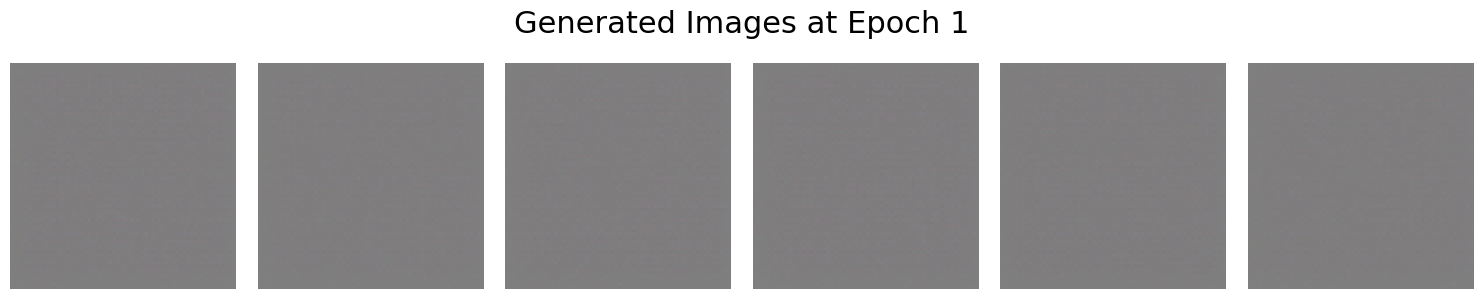

2/2 [==============================] - 0s 13ms/step


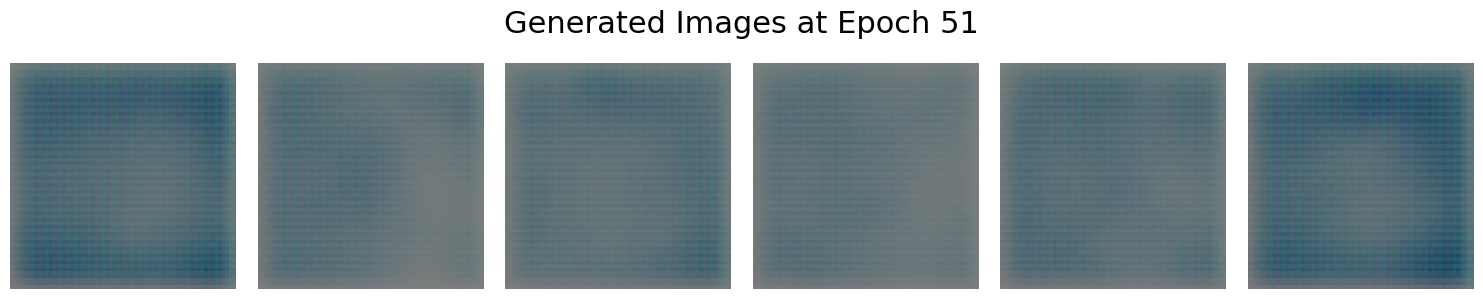

2/2 [==============================] - 0s 13ms/step


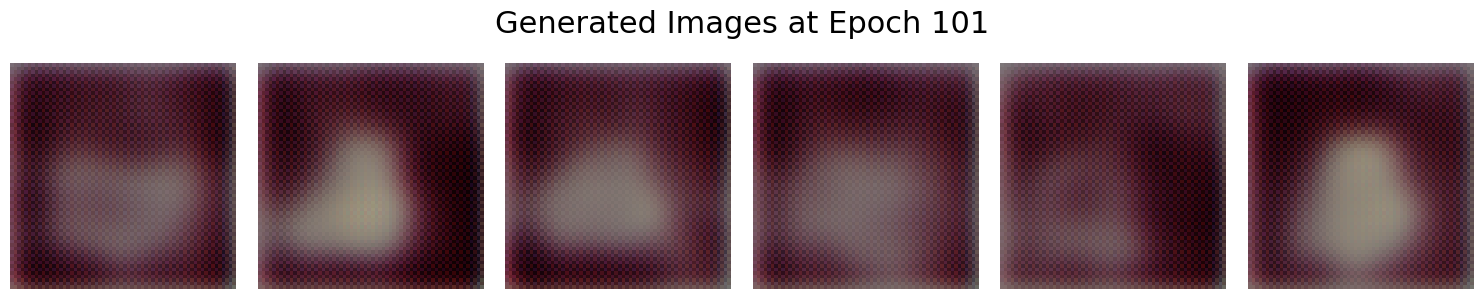

2/2 [==============================] - 0s 13ms/step


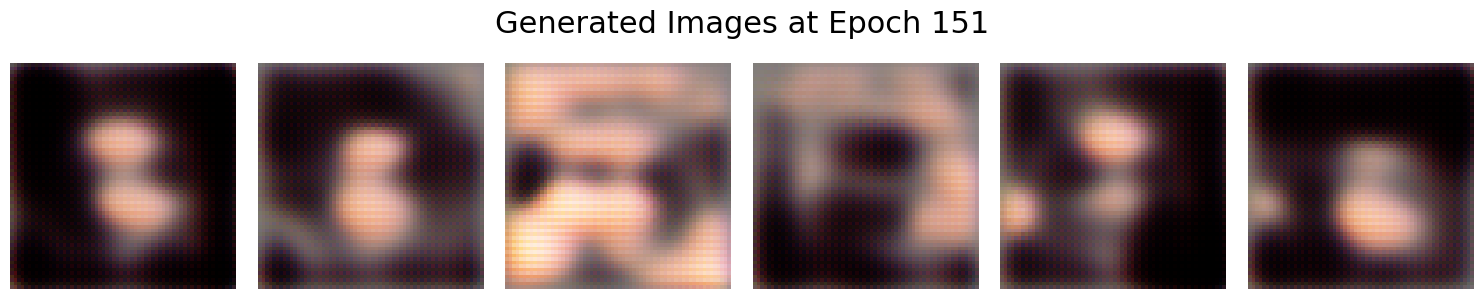

2/2 [==============================] - 0s 13ms/step


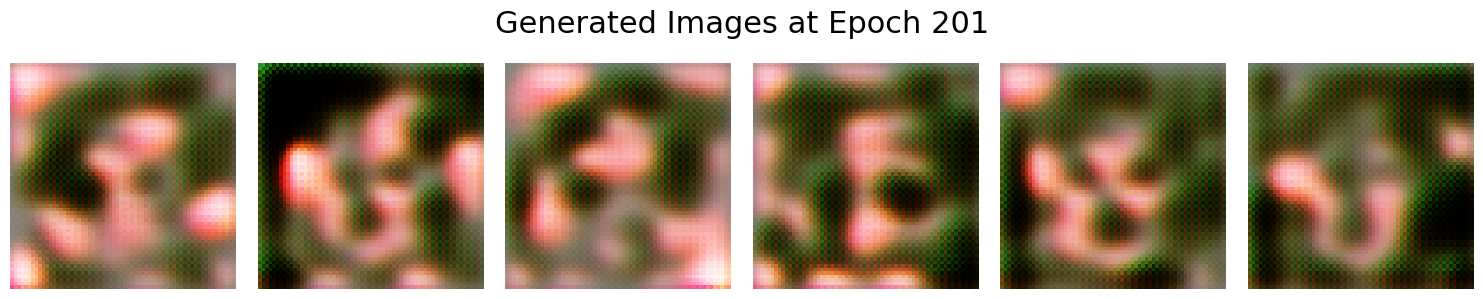

2/2 [==============================] - 0s 13ms/step


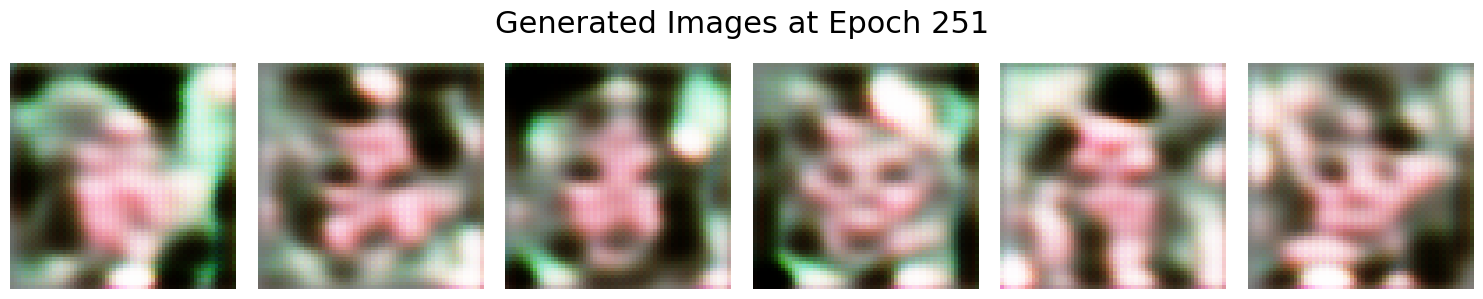

In [ ]:
# 생성기 입력에 대한 노이즈 차원 설정
noise_dimension = 100

# 판별자 모델 구축
discriminator = build_discriminator()

# 생성기 모델 구축
generator = build_generator(noise_dimension)

# 생성기와 판별자를 결합하여 GAN 모델 형성
gan_model = build_gan(generator, discriminator)

# 데이터셋에 대해 GAN 모델을 훈련하고 저장된 이미지 리스트 가져오기
saved_images = train(generator, discriminator, gan_model, dataset, noise_dimension, num_epochs=251, batch_size=128, display_frequency=50, verbose=0)

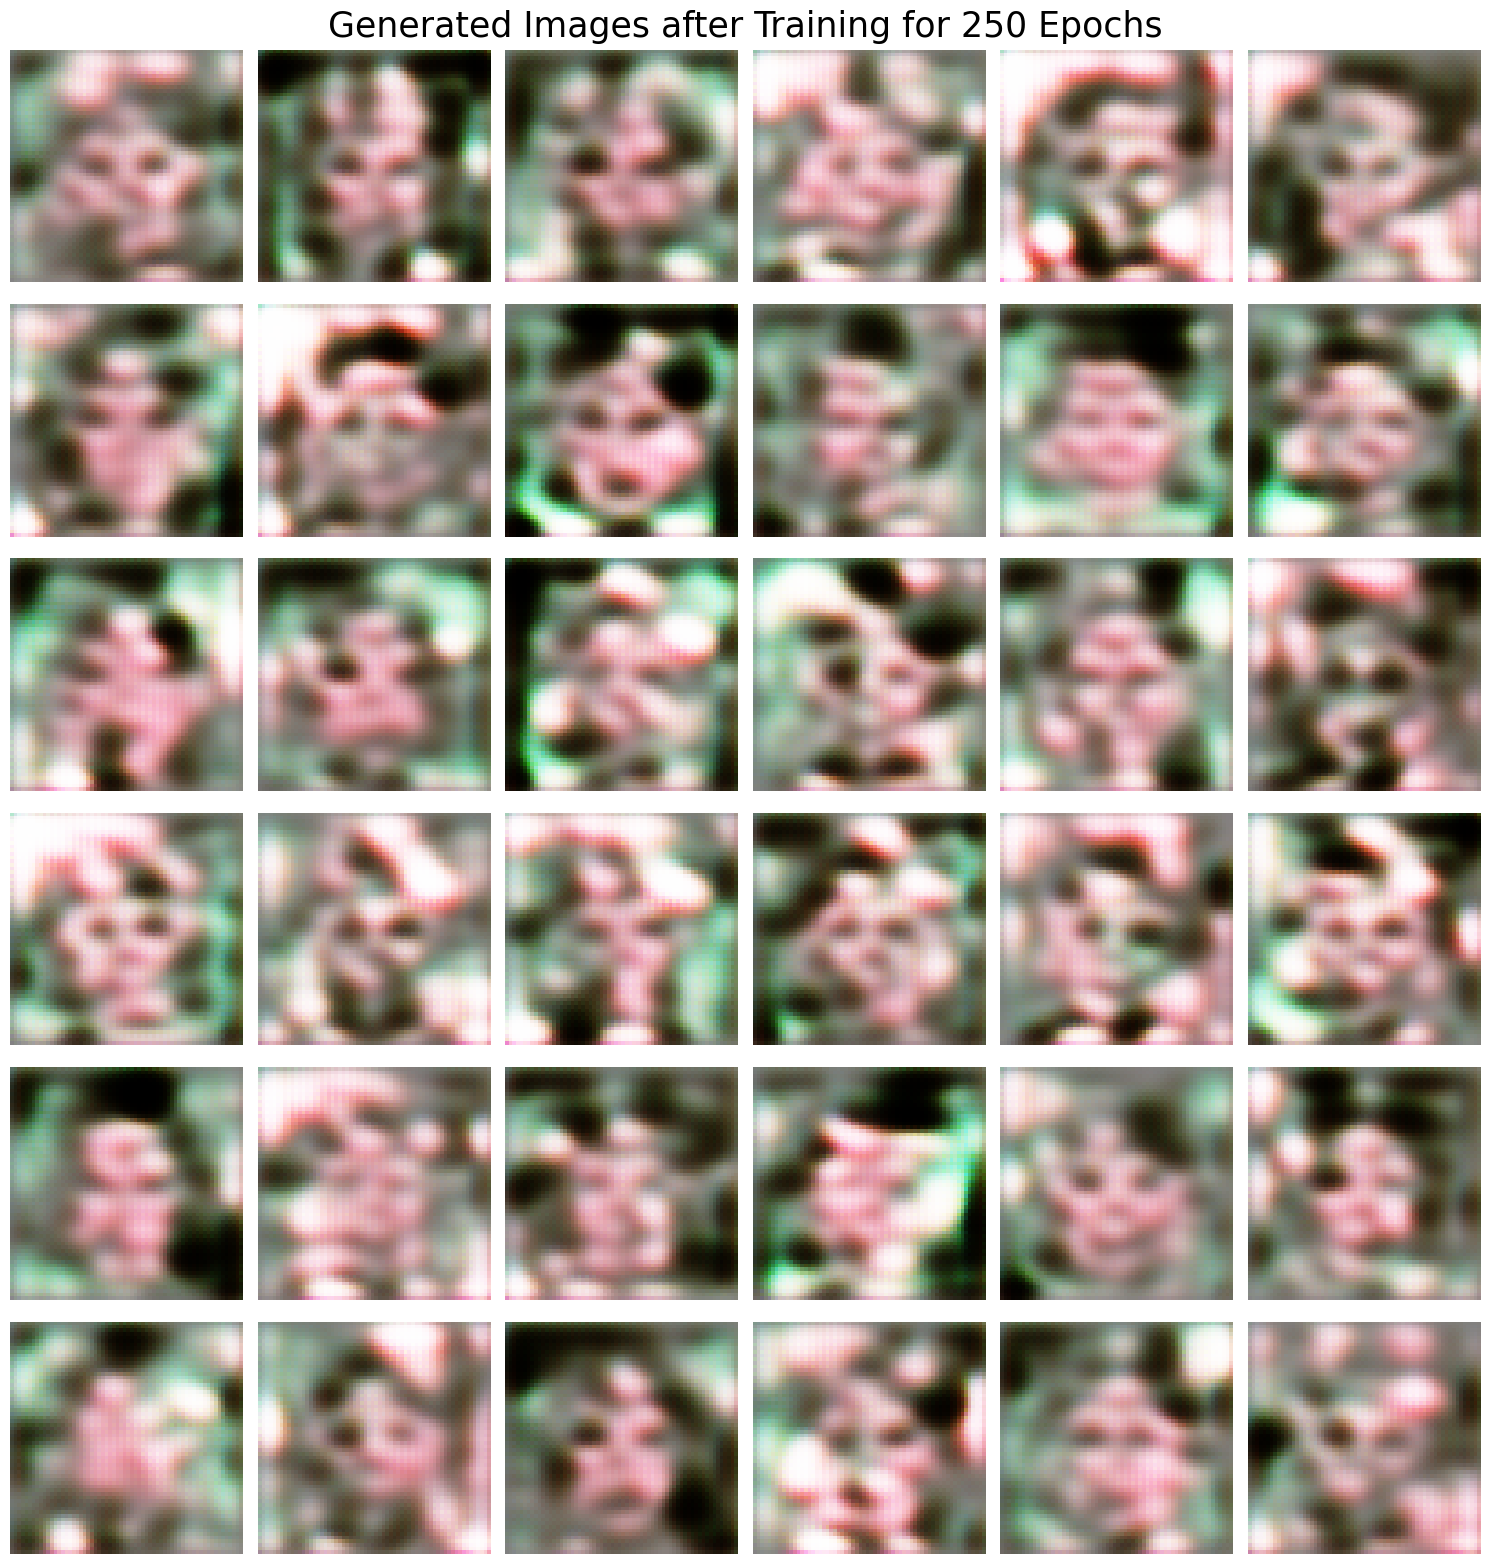

In [ ]:
def plot_generated_images_after_training(generator, noise_dim=100, figsize=(15, 16)):

    fig, axes = plt.subplots(6, 6, figsize=figsize)

    for i, ax in enumerate(axes.flat):
        # 노이즈 샘플 생성
        X_noise = generate_noise_samples(1, noise_dim)

        # 생성기를 사용하여 이미지 생성
        X = generator.predict(X_noise, verbose=0)

        # 시각화를 위해 이미지를 [0, 1] 범위로 재조정
        X = (X + 1) / 2

        # i번째 서브플롯에 이미지 플로팅
        ax.imshow(X[0])
        ax.axis('off')


    fig.suptitle('Generated Images after Training for 250 Epochs', fontsize=25)

    plt.tight_layout()
    plt.show()


plot_generated_images_after_training(generator)

Epoch 0/250 - Avg. Discriminator Loss: 0.3917
Epoch 50/250 - Avg. Discriminator Loss: 0.3460
Epoch 100/250 - Avg. Discriminator Loss: 0.3408
Epoch 150/250 - Avg. Discriminator Loss: 0.4294
Epoch 200/250 - Avg. Discriminator Loss: 0.3930


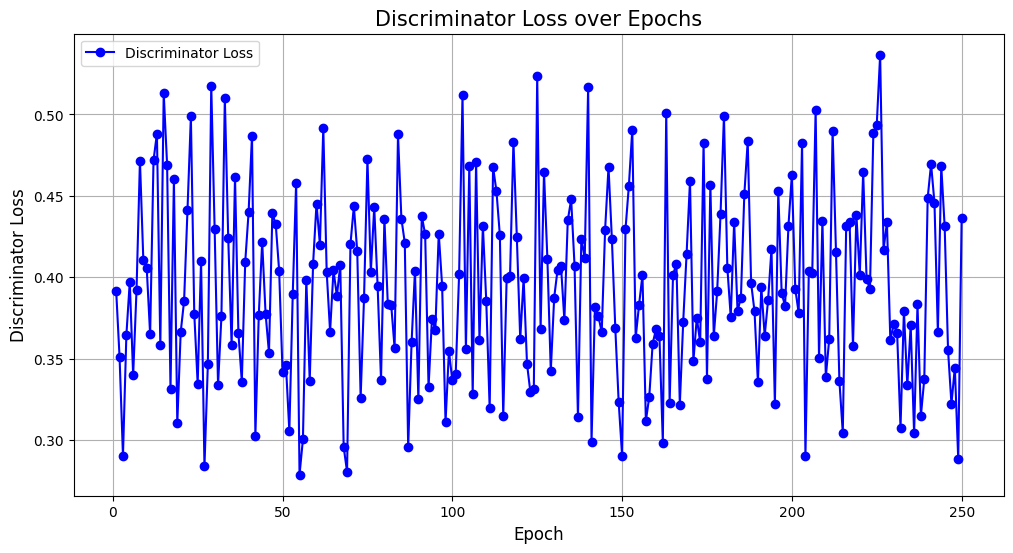

In [ ]:
def plot_discriminator_loss_over_epochs(discriminator_losses, display_frequency=50):
    epochs = len(discriminator_losses)
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, epochs + 1), discriminator_losses, marker='o', linestyle='-', color='b', label='Discriminator Loss')
    plt.title('Discriminator Loss over Epochs', fontsize=15)
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Discriminator Loss', fontsize=12)
    plt.xticks(np.arange(0, epochs + 1, display_frequency))
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_generated_images_with_loss(generator, discriminator, num_images=36, noise_dim=100, epochs=250, batch_size=128, display_frequency=50):
    discriminator_losses = []

    for epoch in range(epochs):
        epoch_discriminator_losses = []

        for _ in range(num_images):
            # 노이즈 샘플 생성
            X_noise = generate_noise_samples(1, noise_dim)

            # 생성기를 사용하여 이미지 생성
            X = generator.predict(X_noise, verbose=0)

            # 시각화를 위해 이미지를 [0, 1] 범위로 재조정
            X = (X + 1) / 2
            X = (X + 1) / 2

            # 판별자 손실 계산 (생성된 이미지에 대해)
            fake_labels = np.zeros((1, 1))  # 생성된 이미지에 대한 레이블 (가짜)
            discriminator_loss, _ = discriminator.evaluate(X, fake_labels, verbose=0)

           # 이 이미지에 대한 판별자 손실 기록
            epoch_discriminator_losses.append(discriminator_loss)

        # 이 에포크에 대한 평균 판별자 손실 계산
        avg_epoch_discriminator_loss = np.mean(epoch_discriminator_losses)

       # 이 에포크에 대한 평균 판별자 손실 기록
        discriminator_losses.append(avg_epoch_discriminator_loss)

        # 진행 상황 출력
        if epoch % display_frequency == 0:
            print(f"Epoch {epoch}/{epochs} - Avg. Discriminator Loss: {avg_epoch_discriminator_loss:.4f}")

    # 에포크에 따른 판별자 손실 플로팅
    plot_discriminator_loss_over_epochs(discriminator_losses, display_frequency)


plot_generated_images_with_loss(generator, discriminator)


In [ ]:
def print_discriminator_accuracy_over_epochs(discriminator_accuracies, display_frequency=50):
    epochs = len(discriminator_accuracies)
    for epoch in range(epochs):
        if epoch % display_frequency == 0:
            accuracy = discriminator_accuracies[epoch]
            print(f"Epoch {epoch+1}: Discriminator Accuracy: {accuracy:.2f}")

def calculate_discriminator_accuracies(generator, discriminator, num_images=36, noise_dim=100, epochs=250):
    discriminator_accuracies = []

    for epoch in range(epochs):
        epoch_discriminator_accuracies = []

        for _ in range(num_images):
            # Generate noise samples
            X_noise = generate_noise_samples(1, noise_dim)

            # Use generator to create an image
            X = generator.predict(X_noise, verbose=0)

            # Rescale images to [0, 1] for plotting
            X = (X + 1) / 2

            # Prepare labels for discriminator evaluation
            real_labels = np.ones((1, 1))  # Labels for real images (real)
            fake_labels = np.zeros((1, 1))  # Labels for generated images (fake)

            # Calculate discriminator accuracy for generated images
            discriminator_accuracy_real = discriminator.evaluate(X, real_labels, verbose=0)[1]
            discriminator_accuracy_fake = discriminator.evaluate(X, fake_labels, verbose=0)[1]

            # Average discriminator accuracy
            discriminator_accuracy = 0.5 * (discriminator_accuracy_real + discriminator_accuracy_fake)

            # Record discriminator accuracy for this image
            epoch_discriminator_accuracies.append(discriminator_accuracy)

        # Calculate average discriminator accuracy for this epoch
        avg_epoch_discriminator_accuracy = np.mean(epoch_discriminator_accuracies)

        # Record average discriminator accuracy for this epoch
        discriminator_accuracies.append(avg_epoch_discriminator_accuracy)

    return discriminator_accuracies

# Calculate discriminator accuracies
discriminator_accuracies = calculate_discriminator_accuracies(generator, discriminator)

# Print discriminator accuracies over epochs
print_discriminator_accuracy_over_epochs(discriminator_accuracies)


Epoch 1: Discriminator Accuracy: 0.50
Epoch 51: Discriminator Accuracy: 0.50
Epoch 101: Discriminator Accuracy: 0.50
Epoch 151: Discriminator Accuracy: 0.50
Epoch 201: Discriminator Accuracy: 0.50
